<center><span style="font-size:35px; font-weight:bold; ">Airfare Analyzer(Predicting Flight Ticket Prices)</span></center>

## Introduction

The **"Flight Fare Prediction"** machine learning project aims to accurately estimate airline ticket prices using relevant attributes such as date, airline, flight codes, departure/arrival times, duration, stops, source/destination, and existing prices. By leveraging machine learning algorithms, we can develop a robust model that assists travelers in making informed decisions and helps airlines optimize their pricing strategies. This project addresses the complex task of predicting flight fares, benefiting both travelers and airlines by providing accurate fare forecasts based on historical data and relevant factors.

<center><img src="flight.jpg"></center>

## About Dataset

1. **Date:** The date of the journey.
    
2. **Airline:** The name of the airline.

3. **ch_code:** The categorical identification code of the flight.
    
4. **num_code:** The numerical identification code of the flight.
    
5. **Dep_Time:** The time when the journey starts from the source.
        
6. **From:** The source from which the service begins.
    
7. **Time Taken:** Total Duration of the flight.
        
8. **Stops:** Total stops between the source and destination.
    
9. **Arrival_Time:** Time of arrival at the destination.
    
10. **To:** The destination where the service ends.

11. **Price:** The price of the ticket.

## PROBLEM STATEMENT

**In this project, we aim to predict flight ticket prices, which are known for their unpredictability. By analyzing data from different airlines and cities, we will use machine learning models to make accurate price predictions.**

## Outline

Here's a brief outline of the steps we'll follow in this notebook:

1. Importing libraries and checking our dataset
2. Data Cleaning
3. Exploration Data Analysis
4. Data Preprocessing
5. Model Building
6. Model Evaluation
7. Conclusion

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time, datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error


## Loading the data

#### ***We have got two csv files so we will load them seperately and after that we will merge them into one***

In [2]:
df1=pd.read_csv("business.csv")
df1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [4]:
df2=pd.read_csv("economy.csv")
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [6]:
df1.shape,df2.shape

((93487, 11), (206774, 11))

### Adding new feature in both of the dataframes.

In [7]:
df1['class']='business'
df2['class']='economy'

#### Appending the records that is concating both the dataframes into one seperate dataframe.

In [8]:
df=df2.append(df1,ignore_index=True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


## Data Checking and understanding

In [9]:
df.shape

(300261, 12)

#### We have 300259 rows and 11 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


In [11]:
df.describe()

,num_code
count,300261.000000
mean,1417.771709
std,1974.514439
min,101.000000
25%,637.000000
50%,818.000000
75%,927.000000
max,9991.000000


In [12]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

### Checking Duplicate values

In [13]:
df.duplicated().sum()

2

### Dropping Duplicate Values

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

## Data Cleaning

### 1. Merging the 'ch_code' and 'num_code' two seperate variables into one as 'flight'

Step 1: Since both columns has different datatypes we need to change the dtype to string

Step 2: Now we can easily create new column which can support the values from both the variables

In [16]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [17]:
df['num_code']=df['num_code'].astype("str")
df["flight"] = df["ch_code"]+"-"+df["num_code"]
df.drop(["ch_code","num_code"],axis = 1,inplace = True)

In [18]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963


### 2. Renaming the featuers for better understanding

In [19]:
df.rename({'dep_time':'departure_time','from':'source_city','time_taken':'duration','stop':'stops',
           'arr_time':'arrival_time','to':'destination_city'},axis=1,inplace=True)

### 3. Adding new column indicating the number of days left for travelling

In [20]:
df['date']

0         11-02-2022
1         11-02-2022
2         11-02-2022
3         11-02-2022
4         11-02-2022
             ...    
300256    31-03-2022
300257    31-03-2022
300258    31-03-2022
300259    31-03-2022
300260    31-03-2022
Name: date, Length: 300259, dtype: object

In [21]:
df['Journey_Month'] = pd.to_datetime(df.date, format='%d-%m-%Y').dt.month
df['Journey_Week'] = pd.to_datetime(df.date, format='%d-%m-%Y').dt.weekday

In [22]:
df["Journey_Month"].value_counts()

3    199671
2    100588
Name: Journey_Month, dtype: int64

In [23]:
df["Journey_Week"].value_counts()

0    44072
1    44041
2    44023
3    44022
6    42398
5    41809
4    39894
Name: Journey_Week, dtype: int64

**Now we dont need date column so  we will drop it as we have created new columns.**

In [25]:
df.drop('date',axis=1,inplace=True)

In [26]:
df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,Journey_Month,Journey_Week
0,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,2,4
1,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157,2,4
2,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764,2,4
3,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995,2,4
4,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963,2,4


### 4. Changing departure time into morming/noon/evening

In [27]:
d= (pd.to_datetime(df["departure_time"]).dt.hour % 24 + 4) // 4
d.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 
                      4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True)
df["departure_time"] = d 
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,Journey_Month,Journey_Week
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,2,4


### 5. Changing arrival time into morming/noon/evening

In [28]:
df.arrival_time.min(),df.arrival_time.max()

('00:05', '23:59')

In [29]:
d= (pd.to_datetime(df["arrival_time"]).dt.hour % 24 + 4) // 4
d.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 
                      4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True)
df["arrival_time"] = d 
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,Journey_Month,Journey_Week
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",economy,SG-8709,2,4


### 6. Making duration in float values by calculating only hours

In [30]:
temp = pd.DataFrame(df["duration"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])

In [31]:
temp.hour.unique()

array(['02h', '12h', '16h', '11h', '14h', '15h', '03h', '05h', '08h',
       '06h', '18h', '23h', '24h', '04h', '19h', '22h', '26h', '17h',
       '20h', '21h', '07h', '10h', '28h', '09h', '13h', '29h', '27h',
       '30h', '25h', '31h', '33h', '36h', '35h', '34h', '39h', '01h',
       '37h', '40h', '32h', '7h', '41h', '38h', '1.03h', '1.02h', '2h',
       '00h', '47h', '1.01h', '5h', '42h', '49h', '45h', '44h'],
      dtype=object)

In [32]:
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)

In [33]:
temp.hour.unique()

array([  2,  12,  16,  11,  14,  15,   3,   5,   8,   6,  18,  23,  24,
         4,  19,  22,  26,  17,  20,  21,   7,  10,  28,   9,  13,  29,
        27,  30,  25,  31,  33,  36,  35,  34,  39,   1,  37,  40,  32,
        41,  38, 103, 102,   0,  47, 101,  42,  49,  45,  44])

In [34]:
temp.minute.unique()

array(['10m', '20m', '15m', '05m', '45m', '30m', '40m', '50m', '00m',
       '25m', '35m', '55m', '04m', 'm', '59m', '24m'], dtype=object)

In [35]:
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r))

In [36]:
temp.minute.unique()

array(['10', '20', '15', '05', '45', '30', '40', '50', '00', '25', '35',
       '55', '04', '', '59', '24'], dtype=object)

#### We have no values in minute column so we will replace it with 0

In [37]:
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"]) # replaceing "" with 0

In [38]:
temp.minute.unique()

array(['10', '20', '15', '05', '45', '30', '40', '50', '00', '25', '35',
       '55', '04', 0, '59', '24'], dtype=object)

In [39]:
temp['minute'].dtypes

dtype('O')

#### Our Minute column has object data type so we will need to change it to int 

In [40]:
temp["minute"] = temp["minute"].astype(int)

In [41]:
temp['minute'].dtypes

dtype('int32')

In [42]:
temp.head()

,hour,minute
0,2,10
1,2,20
2,2,10
3,2,15
4,2,20


#### Combining the hour and minute as total hours into one columm duration column

In [43]:
df["duration"] = np.around((temp["hour"] + (temp["minute"]/60)),2) 
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,Journey_Month,Journey_Week
0,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,"5,953",economy,SG-8709,2,4


### 7. Stops column is in object we will convert it into integer

In [44]:
df.stops.unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [45]:
df["stops"] = df["stops"].apply(lambda r: re.sub("[^0-9]","",r))
df['stops']=np.where(df['stops']=="",0,df['stops'])
df['stops']=df['stops'].astype(int)
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,Journey_Month,Journey_Week
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,"5,953",economy,SG-8709,2,4


In [46]:
df.price.unique()

array(['5,953', '5,956', '5,955', ..., '87,051', '74,731', '77,105'],
      dtype=object)

### 8. Price column has ',' in between the price of tickets

In [47]:
df["price"] = df["price"].apply(lambda r: re.sub("[^0-9]","",r))
df['price']=df['price'].astype(int)
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,Journey_Month,Journey_Week
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,2,4


In [48]:
df.price.unique()

array([ 5953,  5956,  5955, ..., 87051, 74731, 77105])

### 9. Arranging the new features

In [49]:
df.columns

Index(['airline', 'departure_time', 'source_city', 'duration', 'stops',
       'arrival_time', 'destination_city', 'price', 'class', 'flight',
       'Journey_Month', 'Journey_Week'],
      dtype='object')

In [50]:
df=df[["airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration","Journey_Month","Journey_Week","price"]]

In [51]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,Journey_Month,Journey_Week,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,economy,2.17,2,4,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Morning,Mumbai,economy,2.33,2,4,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,economy,2.17,2,4,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,economy,2.25,2,4,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,economy,2.33,2,4,5955


## EDA

### Uni-variate distribution of every possible attribute

In [52]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe())
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300259 non-null  object 
 1   flight            300259 non-null  object 
 2   source_city       300259 non-null  object 
 3   departure_time    300259 non-null  object 
 4   stops             300259 non-null  int32  
 5   arrival_time      300259 non-null  object 
 6   destination_city  300259 non-null  object 
 7   class             300259 non-null  object 
 8   duration          300257 non-null  float64
 9   Journey_Month     300259 non-null  int64  
 10  Journey_Week      300259 non-null  int64  
 11  price             300259 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 27.5+ MB


In [54]:
df_num = df.select_dtypes(include = ['float64', 'int32','int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

5

In [55]:
lstnumericcolumns

['stops', 'duration', 'Journey_Month', 'Journey_Week', 'price']

Description of stops
----------------------------------------------------------------------------
count    300259.000000
mean          0.924212
std           0.398189
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: stops, dtype: float64
Distribution of stops
----------------------------------------------------------------------------


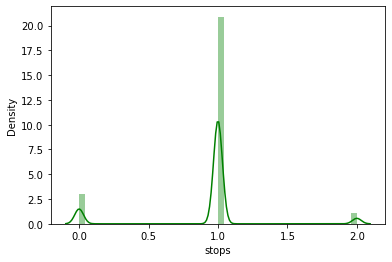

BoxPlot of stops
----------------------------------------------------------------------------


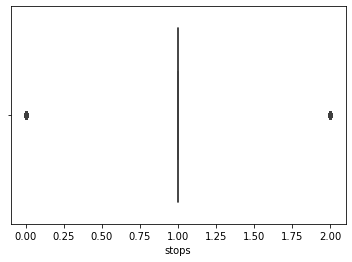

Description of duration
----------------------------------------------------------------------------
count    300257.000000
mean         12.219158
std           7.200312
min           0.830000
25%           6.750000
50%          11.250000
75%          16.170000
max         103.000000
Name: duration, dtype: float64
Distribution of duration
----------------------------------------------------------------------------


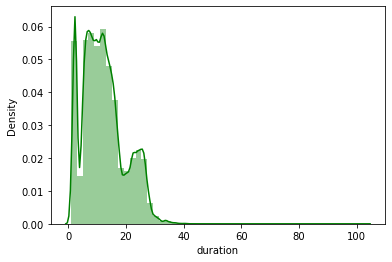

BoxPlot of duration
----------------------------------------------------------------------------


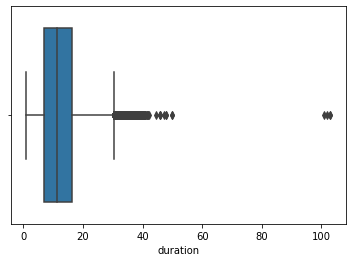

Description of Journey_Month
----------------------------------------------------------------------------
count    300259.000000
mean          2.664996
std           0.471993
min           2.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: Journey_Month, dtype: float64
Distribution of Journey_Month
----------------------------------------------------------------------------


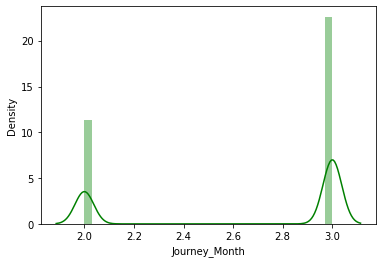

BoxPlot of Journey_Month
----------------------------------------------------------------------------


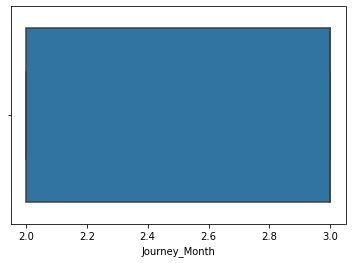

Description of Journey_Week
----------------------------------------------------------------------------
count    300259.000000
mean          2.954656
std           2.003243
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Journey_Week, dtype: float64
Distribution of Journey_Week
----------------------------------------------------------------------------


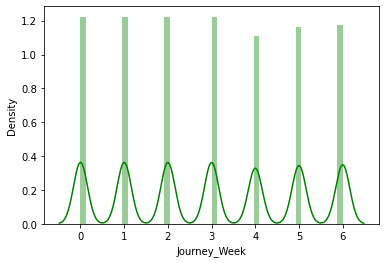

BoxPlot of Journey_Week
----------------------------------------------------------------------------


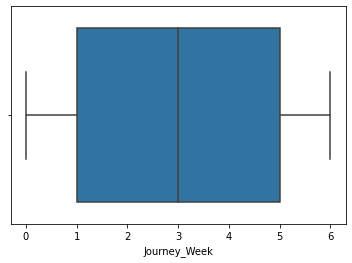

Description of price
----------------------------------------------------------------------------
count    300259.000000
mean      20883.800386
std       22695.962230
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64
Distribution of price
----------------------------------------------------------------------------


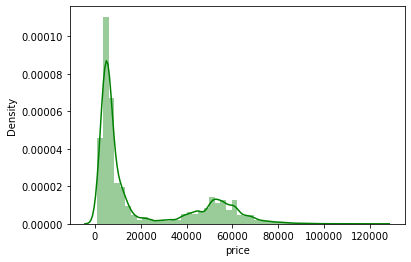

BoxPlot of price
----------------------------------------------------------------------------


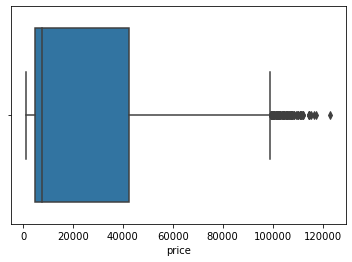

In [56]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x)

### Observations

1. There are 4 numeric fields in the data
2. The maximum number of stopovers during a flight is limited to 1.
3. The "duration" column contains a significant number of outliers.
4. The majority of flight tickets are booked in the economy class, and the price range of the tickets falls between 1105 and 123071 Rupees.

In [57]:
def univariateAnalysis_category(cat_column, color='summer'):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure(figsize=(6, 6))
    df_cat[cat_column].value_counts().plot.pie(title="Frequency Distribution of " + cat_column, colormap=color)
    plt.show()
    print("       ")


In [58]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['airline',
 'flight',
 'source_city',
 'departure_time',
 'arrival_time',
 'destination_city',
 'class']

In [59]:
lstcatcolumns.remove('flight')

Details of airline
----------------------------------------------------------------
Vistara      127859
Air India     80892
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64


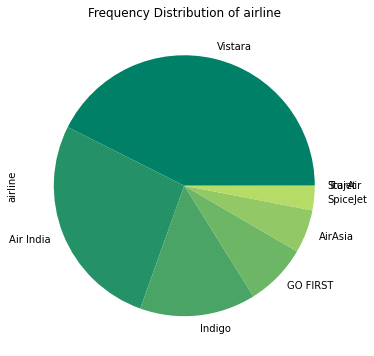

       
Details of source_city
----------------------------------------------------------------
Delhi        61343
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: source_city, dtype: int64


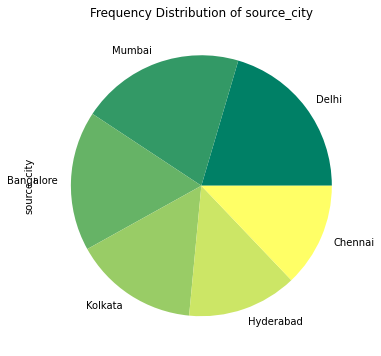

       
Details of departure_time
----------------------------------------------------------------
Morning          75250
Evening          65416
Early Morning    62042
Night            49504
Afternoon        46857
Late Night        1190
Name: departure_time, dtype: int64


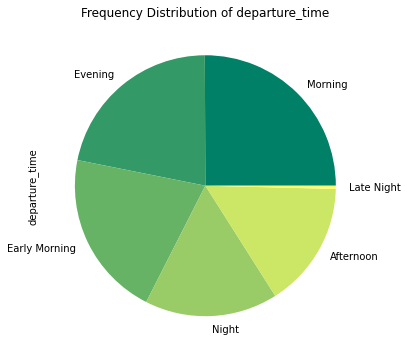

       
Details of arrival_time
----------------------------------------------------------------
Night            93584
Evening          77104
Morning          63782
Afternoon        37907
Late Night       14001
Early Morning    13881
Name: arrival_time, dtype: int64


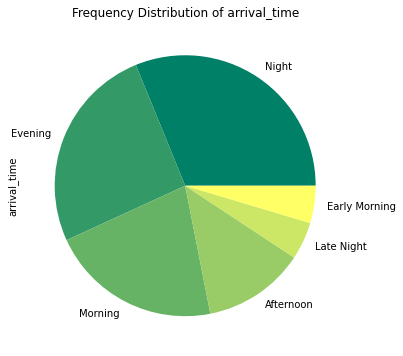

       
Details of destination_city
----------------------------------------------------------------
Mumbai       59107
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: destination_city, dtype: int64


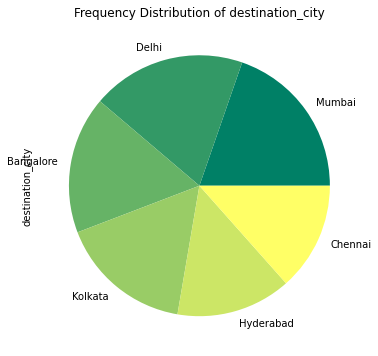

       
Details of class
----------------------------------------------------------------
economy     206772
business     93487
Name: class, dtype: int64


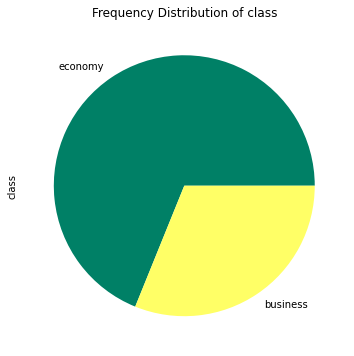

In [60]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Observations

1. There are 7 category fields in the data
2. The Vistara Airlines is the most preferred choice among passengers, followed by Air India in the second position. On the other hand, Trujet is the least preferred airline among the options.
3. Delhi is the most common source city for flights, while Mumbai is the most popular destination city.
4. Most flight departures occur in the morning, while the majority of flight arrivals take place at night.

### Bi-variate distribution of every possible attribute pair

### Checking whether the ticket prices vary based on the airlines

<AxesSubplot:xlabel='airline', ylabel='price'>

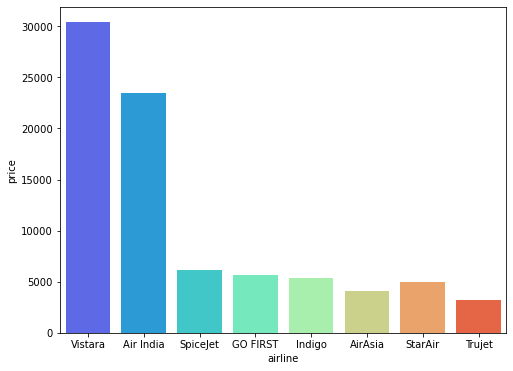

In [61]:
plt.figure(figsize=(8,6))
df_sorted = df.sort_values('price', ascending=False)
sns.barplot(x='airline',y='price',data=df_sorted,ci=None, palette='rainbow');

We can clearly see the price depends upon the airlines. With Vistara being the costliest and Trujet being the cheapest

### Checking whether the ticket prices vary based on journey_month

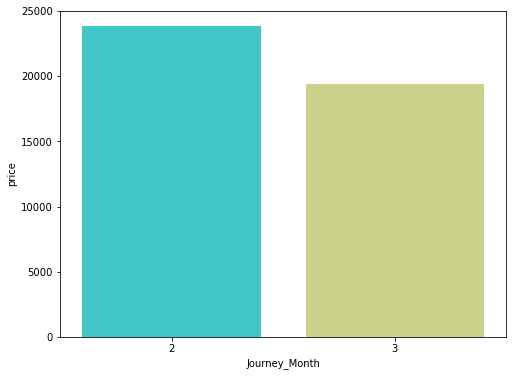

In [62]:
plt.figure(figsize=(8,6))
df_sorted = df.sort_values('price', ascending=False)
sns.barplot(x='Journey_Month',y='price',data=df_sorted,ci=None, palette='rainbow');

We see that the total count of flight is maximum towards the month-Feb which can also be concluded from the above bar plot which shows that the sum of fare is maximum in Feb.

### On which day the flight price is highest?

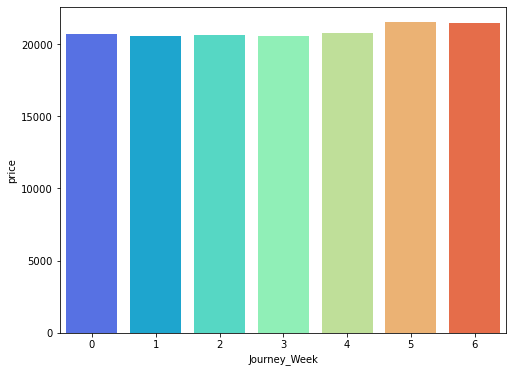

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x='Journey_Week', y='price', data=df.sort_values('price', ascending=False), ci=None, palette='rainbow');

It appears that all days have the same price, except for Saturday and Sunday, which have slightly higher prices compared to the other weekdays.

### Analysing Does ticket price change based on the arrival time?

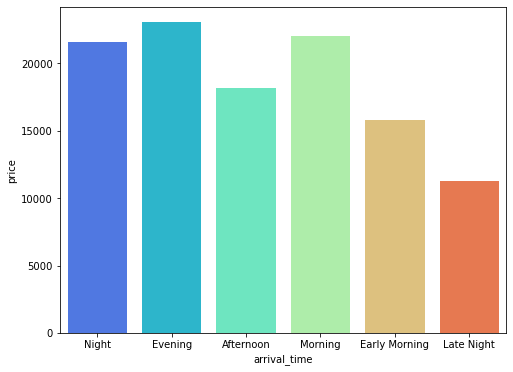

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(x='arrival_time',y='price',data=df.sort_values('price', ascending=False),ci=None, palette='rainbow');

1. The ticket prices are higher for flights that arrive in the evening.
2. The ticket prices are lower for flights that arrive late at night.

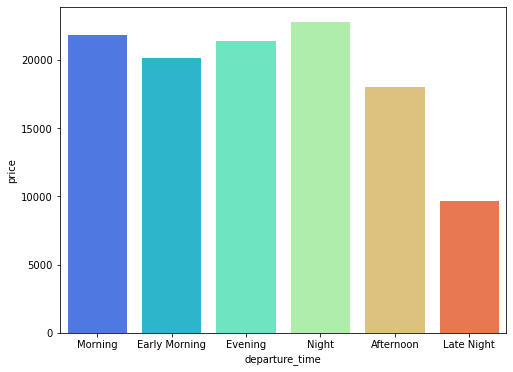

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(x='departure_time',y='price',data=df.sort_values('price', ascending=False),ci=None, palette='rainbow');

1. The ticket prices are higher for flights scheduled for departure at night.
2. The ticket prices are lower for flights scheduled for departure during the late night.

### Analysing How the price changes with change in Source and Destination?

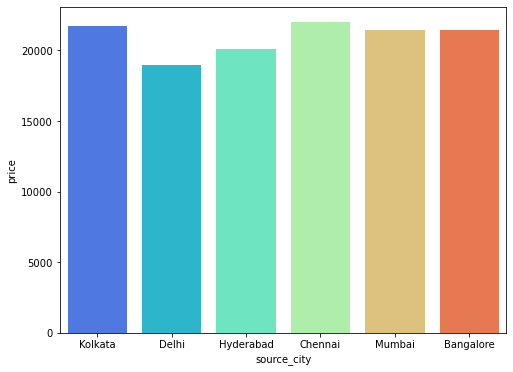

In [66]:
plt.figure(figsize=(8,6))
df_sorted = df.sort_values('price', ascending=False)
sns.barplot(x='source_city',y='price',data=df_sorted,ci=None, palette='rainbow')
plt.show()

1. Ticket Price is More for the Flights whose Source City is Kolkata.
2. Ticket Price is Low for the Flights Having Source City as Delhi.

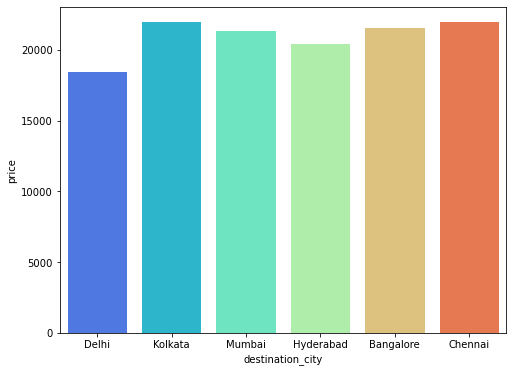

In [67]:
plt.figure(figsize=(8,6))
df_sorted = df.sort_values('price', ascending=False)
sns.barplot(x='destination_city',y='price',data=df_sorted,ci=None, palette='rainbow')
plt.show()

1. The ticket prices are higher for flights with the destination cities of Kolkata and Chennai.
2. Ticket Price is Low for the Flights Having Destination City as Delhi.

### Checking the price variation between the source and destination in each airline

In [68]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,Air India,Bangalore,Chennai,26765.567702
1,Air India,Bangalore,Delhi,20699.099886
2,Air India,Bangalore,Hyderabad,23395.956912
3,Air India,Bangalore,Kolkata,29105.826259
4,Air India,Bangalore,Mumbai,25625.530802
...,...,...,...,...
178,Vistara,Mumbai,Bangalore,35029.880315
179,Vistara,Mumbai,Chennai,32181.946251
180,Vistara,Mumbai,Delhi,26402.695114
181,Vistara,Mumbai,Hyderabad,29497.578017


### Checking the average prices between the cities

In [69]:
pd.pivot_table(data=df,columns='source_city',index='destination_city',values='price')

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
destination_city,,,,,,
Bangalore,NaN,25081.850454,17880.216315,21245.945429,22744.808428,23147.873807
Chennai,23321.850078,NaN,19369.881354,21848.065989,23660.361040,22781.899112
Delhi,17723.313972,18981.863948,NaN,17242.639473,19422.354559,18725.320008
Hyderabad,21152.051053,21591.345404,17347.288379,NaN,21500.011397,20992.128567
Kolkata,23498.234221,22669.932407,20566.409418,20823.893201,NaN,22379.146723
Mumbai,23127.231376,22765.849647,19355.829812,20065.715179,22078.883579,NaN


### Plotting the information regarding price variance between cities

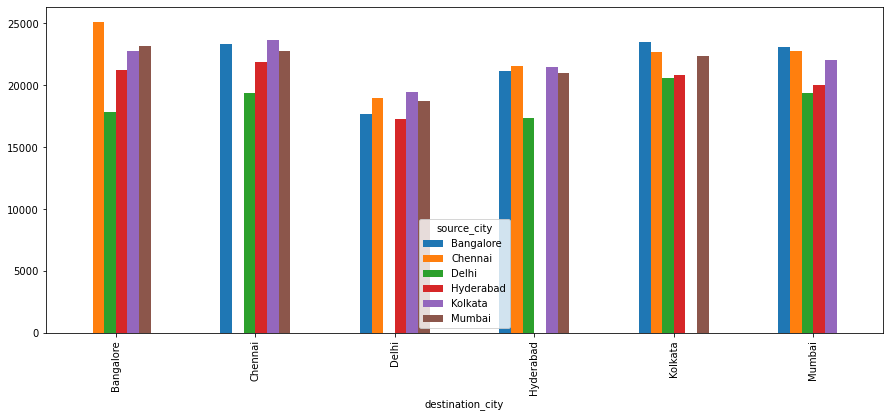

In [70]:
table = pd.crosstab(columns=df["source_city"], index=df["destination_city"], values=df["price"], aggfunc="mean")
table.plot(kind="bar", figsize=(15,6))
plt.show()

The ticket prices from Bangalore exhibit significant variation. Specifically, the flight from Bangalore to Chennai has the highest fare among the available routes.

### Analyzing how does the ticket price vary between the Economy class and bussiness class

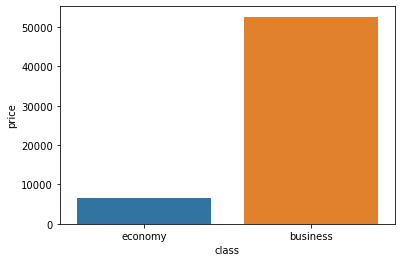

In [71]:
sns.barplot(x='class',y='price',data=df)
plt.show()

The business class price is higher than economy class

### Multivariate Analysis

#### How Journey_month is affecting the price of different airlines?

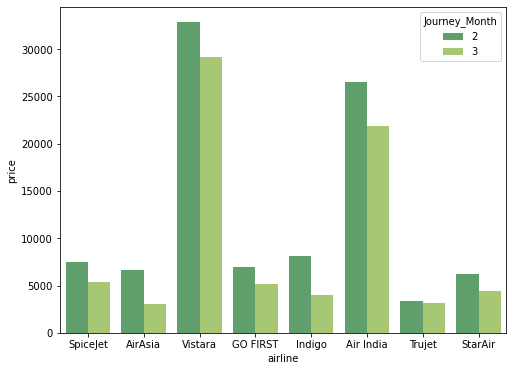

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x='airline',y='price',data=df,hue='Journey_Month',ci=None, palette='summer');

Vistara has the highest number of tickets booked both Feb and March. 

In [73]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration',
       'Journey_Month', 'Journey_Week', 'price'],
      dtype='object')

#### Which city has the maximum number of business class bookings?

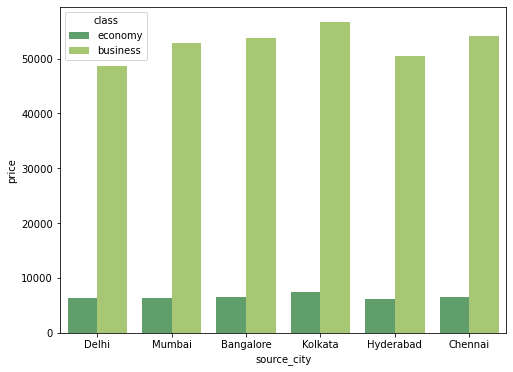

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(x='source_city',y='price',data=df,hue='class',ci=None, palette='summer');

It looks like Kolkata has the highest no of business class ticket bookings.

### Heatmap

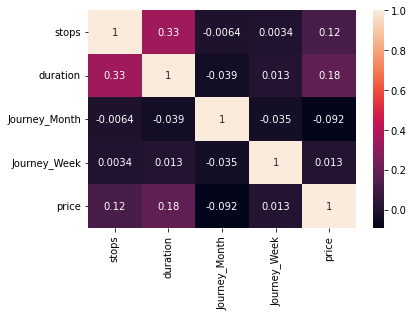

In [75]:
sns.heatmap(df.corr(),annot=True)
plt.show();

There is no multicolinearity in our independent columns.

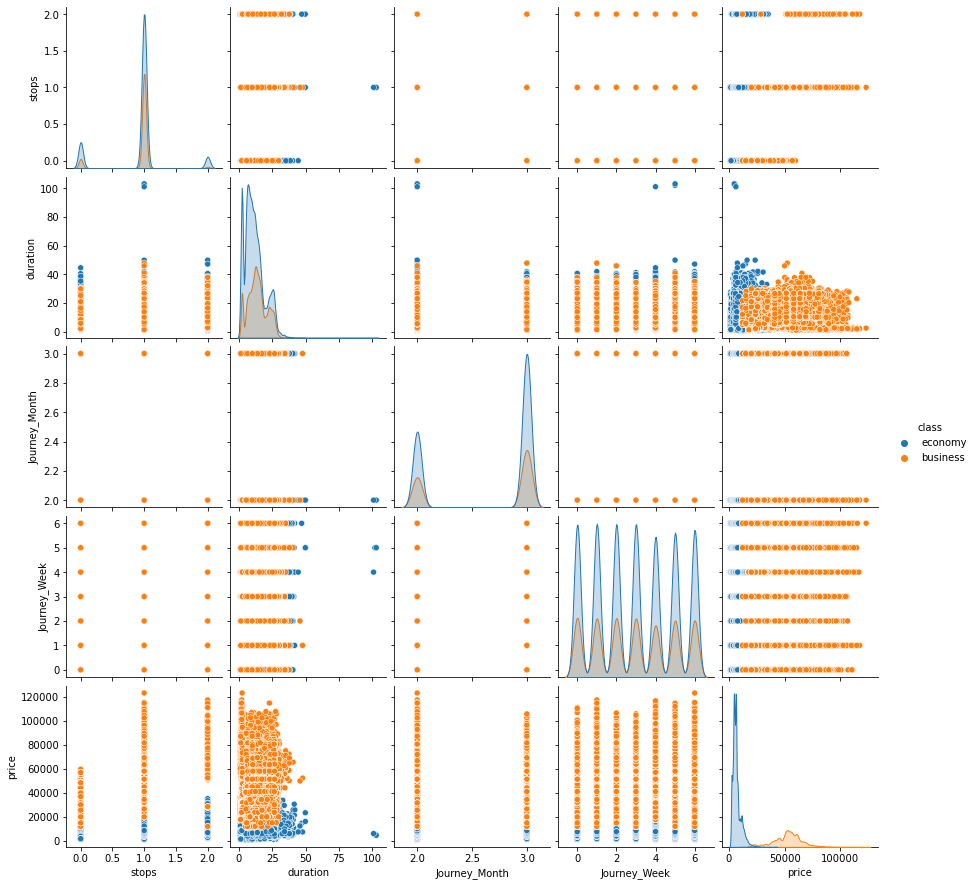

In [76]:
sns.pairplot(df,hue='class');

## Checking Missing Values

In [77]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            2
Journey_Month       0
Journey_Week        0
price               0
dtype: int64

### Missing value Treatment

In [78]:
df.dropna(inplace=True)

In [79]:
# Dropping missing values in duration column due to very less in no.

## Outlier Checking & Treatment

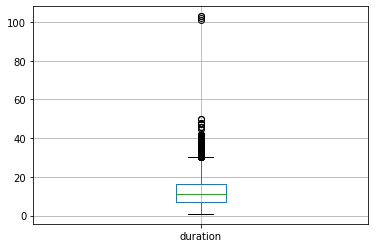

In [80]:
df.boxplot(column='duration')
plt.show()

We have identified outliers in the duration feature, but instead of replacing them, we will minimize their impact. The duration represents the actual time taken by a flight from the source to the destination, and we will consider it as real-time data.

### Dropping unnecessey column

We dont need the flight column as we are getting the more information from airline column. So we will drop the flight column.

In [81]:
df1=df.drop('flight',axis=1)
df1.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,Journey_Month,Journey_Week,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,economy,2.17,2,4,5953


## Encoding

**Since we have ordinal data in the features mentioned below:**

1. Departure time
2. Arrival time
3. Class

We can directly replace them based on their order.

In [82]:
df1["departure_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5},
                              inplace = True)
df1["arrival_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5},
                              inplace = True)
df1["class"].replace({"economy":0,"business":1},inplace=True)
df1["Journey_Month"].replace({"2":0,"3":1})
df1.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,Journey_Month,Journey_Week,price
0,SpiceJet,Delhi,4,0,5,Mumbai,0,2.17,2,4,5953
1,SpiceJet,Delhi,1,0,2,Mumbai,0,2.33,2,4,5953
2,AirAsia,Delhi,1,0,1,Mumbai,0,2.17,2,4,5956


### One Hot Encoding

In [83]:
df2 = pd.get_dummies(df1, columns=['airline', 'destination_city', 'source_city'], drop_first=True)

In [84]:
df2.head(1)

,departure_time,stops,arrival_time,class,duration,Journey_Month,Journey_Week,price,airline_AirAsia,airline_GO FIRST,...,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,4,0,5,0,2.17,2,4,5953,0,0,...,0,0,0,0,1,0,1,0,0,0


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300257 entries, 0 to 300258
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   departure_time              300257 non-null  int64  
 1   stops                       300257 non-null  int32  
 2   arrival_time                300257 non-null  int64  
 3   class                       300257 non-null  int64  
 4   duration                    300257 non-null  float64
 5   Journey_Month               300257 non-null  int64  
 6   Journey_Week                300257 non-null  int64  
 7   price                       300257 non-null  int32  
 8   airline_AirAsia             300257 non-null  uint8  
 9   airline_GO FIRST            300257 non-null  uint8  
 10  airline_Indigo              300257 non-null  uint8  
 11  airline_SpiceJet            300257 non-null  uint8  
 12  airline_StarAir             300257 non-null  uint8  
 13  airline_Trujet

## Train Test Split

In [86]:
# separate Independent and Dependent Var into X and Y
# X will contain all the independent variable and y will have the dependent variable

x=df2.drop('price',axis=1)
y=df2['price']

In [87]:
# Train test Split (70:30)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

### Now all the data preprocessing and feature enginering and EDA has been.Now,lets build the model.

# Model Building

In [88]:
### Model selection

def get_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    mape_tr = mean_absolute_percentage_error(y_train,y_pred)
    r2_tr  = r2_score(y_train,y_pred)
    y_pred1 = model.predict(x_test)
    mape_te = mean_absolute_percentage_error(y_test,y_pred1)
    r2_te  = r2_score(y_test,y_pred1)
    return print(f"""At Training: \n%MAE: {mape_tr}\nR2_Score: {r2_tr}
    \nAt Testing: \n%MAE: {mape_te}\nR2_Score: {r2_te}""")

### Without scalling model performances

In [89]:
lst = [("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor()),
      ("Random Forest",RandomForestRegressor())]

for name,model in lst:
    print(f"The Performance of {name} without Scaling::")
    get_prediction(model)
    print("*"*50)

The Performance of Linear Regression without Scaling::
At Training: 
%MAE: 0.4188682917499047
R2_Score: 0.9097903808556164
    
At Testing: 
%MAE: 0.420357297230459
R2_Score: 0.9081225020818555
**************************************************
The Performance of Decision Tree without Scaling::
At Training: 
%MAE: 0.012365906177322738
R2_Score: 0.998754776872001
    
At Testing: 
%MAE: 0.13305602545370732
R2_Score: 0.9721288815651157
**************************************************
The Performance of Random Forest without Scaling::
At Training: 
%MAE: 0.04930726422758481
R2_Score: 0.9967677914711471
    
At Testing: 
%MAE: 0.11909050137808036
R2_Score: 0.9826104545706166
**************************************************


## Scaling the data 

In [90]:
std=StandardScaler()

In [91]:
x_train = pd.DataFrame(std.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(std.fit_transform(x_test),columns = x_test.columns)


#### With scalling model performances

In [92]:
lst = [("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor()),
      ("Random Forest",RandomForestRegressor())]
for name,model in lst:
    print(f"The Performance of {name} with Scaling::")
    get_prediction(model)
    print("*"*50)

The Performance of Linear Regression with Scaling::
At Training: 
%MAE: 0.4188682917499028
R2_Score: 0.9097903808556164
    
At Testing: 
%MAE: 0.420011962158593
R2_Score: 0.9081204988314605
**************************************************
The Performance of Decision Tree with Scaling::
At Training: 
%MAE: 0.012365906177322738
R2_Score: 0.998754776872001
    
At Testing: 
%MAE: 0.13368546095883876
R2_Score: 0.9718447272602908
**************************************************
The Performance of Random Forest with Scaling::
At Training: 
%MAE: 0.04930510894027133
R2_Score: 0.9967881327469293
    
At Testing: 
%MAE: 0.11905746995176267
R2_Score: 0.9826081247947028
**************************************************


## As we can see that Random Forest has good r2 values at both training and testing as well and also has lowest %mae.

# So,we will go with the Random Forest Model.

In [93]:
## Training the model

RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [94]:
# Predicting the values
y_pred=RF.predict(x_test)
y_pred

array([ 6634.91833333, 55377.        , 61691.72      , ...,
       10021.39797619,  6133.        ,  5102.99      ])

In [95]:
r2=r2_score(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print(f"The Performance of the model::\nR2_score:{r2}\n%MAE:{mape}")

The Performance of the model::
R2_score:0.9825910740202614
%MAE:0.1191632689292971


## We can see the goodness of best fit line is 98% which is quite acceptable.

### Feature Importance

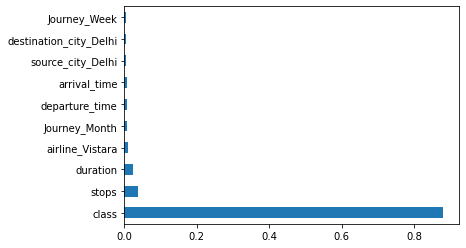

In [98]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [100]:
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(x, y)
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': RF_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances.head(10))

                   feature  importance
3                    class    0.880676
1                    stops    0.037645
4                 duration    0.025316
13         airline_Vistara    0.009902
5            Journey_Month    0.007527
0           departure_time    0.005955
2             arrival_time    0.005560
20       source_city_Delhi    0.004068
6             Journey_Week    0.003627
15  destination_city_Delhi    0.003523


The most important feature for predicting the target variable (flight price) is "class," which holds the highest importance value of 0.8807.

# Conclusion

Based on the given scores, the Random Forest model performs the best overall, with the highest train and test scores. It also has the lowest MAE values, indicating a better result.